In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [ ]:
# Define font sizes
SIZE_DEFAULT = 20
SIZE_LARGE = 20
plt.rc("font", family="Arial")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

In [8]:
import os, json, re
import pandas as pd

ROOT = "."
acc_mcr, acc_mer = {}, {}

def normalize_id(filename: str) -> str:
    stem = os.path.splitext(filename)[0]
    mol_id = stem.split("_", 1)[-1]
    mol_id = re.sub(r'(_(?:model|fold|seed|run)_\d+)$', '', mol_id)
    return mol_id

for root, _, files in os.walk(ROOT):
    base = os.path.basename(root).lower()

    if "mcr" in base:
        acc = acc_mcr
    elif "mer" in base:
        acc = acc_mer
    else:
        continue

    if "afinidade" in base or "affinity" in base:
        bloco = "aff"
    elif "confidence" in base:
        bloco = "conf"
    else:
        continue

    for file in files:
        if not file.endswith(".json"):
            continue

        id_ = normalize_id(file)

        with open(os.path.join(root, file), "r", encoding="utf-8") as f:
            data = json.load(f)
        flat = pd.json_normalize(data, sep=".").to_dict(orient="records")[0]

        # cria linha se não existir
        if id_ not in acc:
            acc[id_] = {"id": id_}

        # regra de mescla: aff tem prioridade sobre conf em chaves duplicadas
        if bloco == "aff":
            acc[id_].update(flat)  # escreve tudo
        else:  # bloco == "conf"
            for k, v in flat.items():
                if k not in acc[id_]:  # não sobrescreve valores já vindos de aff
                    acc[id_][k] = v

df_mcr = pd.DataFrame(acc_mcr.values()).sort_values("id").reset_index(drop=True)
df_mer = pd.DataFrame(acc_mer.values()).sort_values("id").reset_index(drop=True)


In [9]:
df_mer

,id,affinity_pred_value,affinity_probability_binary,affinity_pred_value1,affinity_probability_binary1,affinity_pred_value2,affinity_probability_binary2,confidence_score,ptm,iptm,...,complex_plddt,complex_iplddt,complex_pde,complex_ipde,chains_ptm.0,chains_ptm.1,pair_chains_iptm.0.0,pair_chains_iptm.0.1,pair_chains_iptm.1.0,pair_chains_iptm.1.1
0,100665-40-5,1.113750,0.448269,1.200693,0.544760,1.026807,0.351777,0.954318,0.963752,0.912850,...,0.964685,0.913514,0.394418,1.213093,0.969553,0.870054,0.969553,0.532940,0.912850,0.870054
1,101-31-5,0.998429,0.423478,0.279579,0.571588,1.717279,0.275369,0.964210,0.967607,0.954354,...,0.966674,0.918645,0.348657,0.838228,0.968566,0.942273,0.968566,0.561253,0.954354,0.942273
2,10176-66-6,1.155925,0.436458,1.029422,0.427836,1.282428,0.445081,0.942687,0.963116,0.873914,...,0.959880,0.884820,0.391502,1.531229,0.969915,0.909529,0.969915,0.475784,0.873914,0.909529
3,102040-03-9,-0.774390,0.399191,-0.969586,0.251069,-0.579195,0.547313,0.913020,0.955209,0.910628,...,0.913619,0.756765,0.466907,1.531080,0.973212,0.858995,0.973212,0.592563,0.910628,0.858995
4,102067-84-5,0.994770,0.586188,0.838763,0.690679,1.150778,0.481696,0.957505,0.966876,0.910562,...,0.969241,0.941656,0.366674,1.339538,0.970829,0.919700,0.970829,0.497021,0.910562,0.919700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,99217-63-7,1.274448,0.547821,1.631132,0.610463,0.917765,0.485180,0.950101,0.965315,0.924875,...,0.956407,0.880579,0.379618,1.065867,0.969014,0.864292,0.969014,0.490843,0.924875,0.864292
1256,99217-68-2,0.916726,0.545680,0.918773,0.670245,0.914678,0.421116,0.957825,0.963134,0.896855,...,0.973067,0.940295,0.392026,1.352638,0.968464,0.868839,0.968464,0.461970,0.896855,0.868839
1257,99224-12-1,1.255630,0.615726,1.380787,0.705781,1.130472,0.525671,0.916288,0.952690,0.856493,...,0.931236,0.761173,0.500148,1.784622,0.966183,0.792986,0.966183,0.411397,0.856493,0.792986
1258,997-55-7,2.191248,0.233994,1.909083,0.202466,2.473413,0.265521,0.924687,0.957625,0.779788,...,0.960912,0.846550,0.434117,3.175887,0.964598,0.907833,0.964598,0.243516,0.779788,0.907833


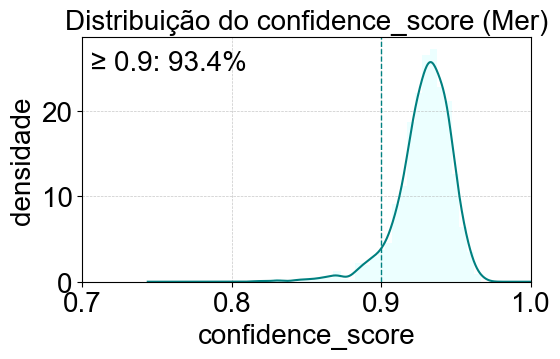

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mer["confidence_score"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("confidence_score")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do confidence_score (Mer)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


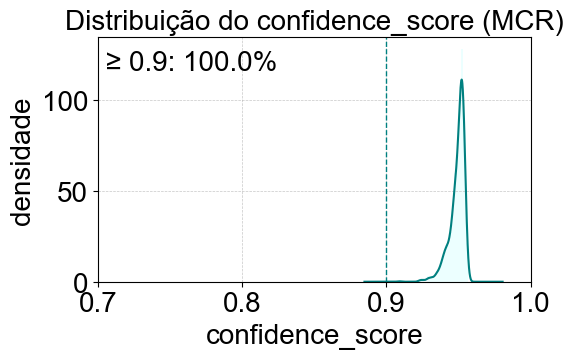

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mcr["confidence_score"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("confidence_score")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do confidence_score (MCR)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


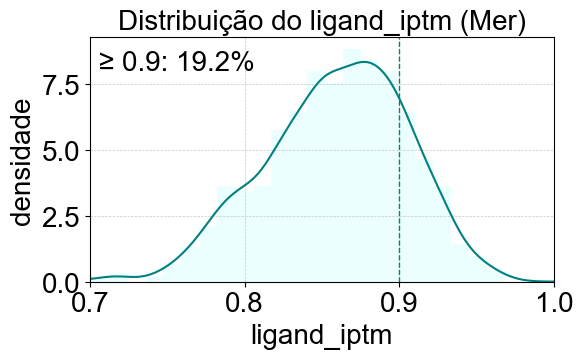

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mer["ligand_iptm"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("ligand_iptm")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do ligand_iptm (Mer)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


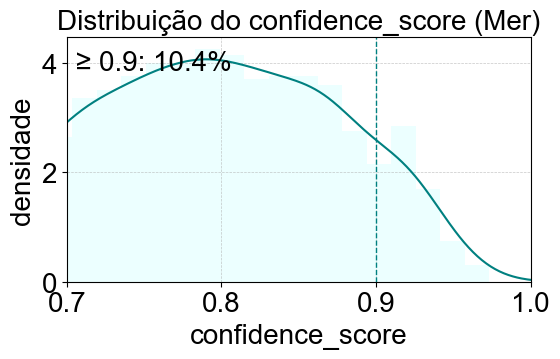

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mcr["ligand_iptm"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("confidence_score")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do confidence_score (Mer)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
conf = pd.to_numeric(df_mer["confidence_score"], errors="coerce")
mask = x.notna() & y.notna() & conf.notna()

lo = conf[mask] < 0.90
hi = ~lo

plt.figure(figsize=(6,4))
plt.scatter(x[mask][hi], y[mask][hi], s=20, alpha=0.7, label="conf ≥ 0.93")
plt.scatter(x[mask][lo], y[mask][lo], s=20, alpha=0.7, label="conf < 0.93", color="red")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("MER: ligand_iptm vs affinity_probability_binary")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


NameError: name 'x' is not defined

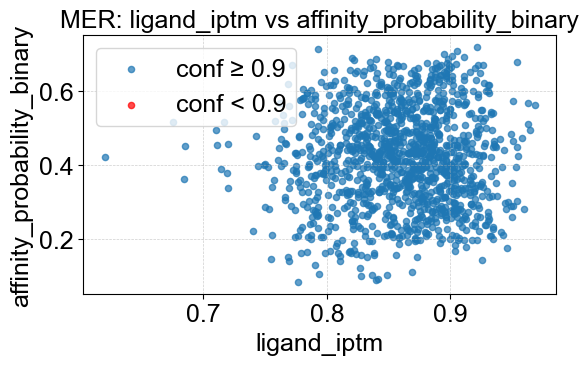

In [97]:
conf = pd.to_numeric(df_mcr["confidence_score"], errors="coerce")
mask = x.notna() & y.notna() & conf.notna()

lo = conf[mask] < 0.9
hi = ~lo

plt.figure(figsize=(6,4))
plt.scatter(x[mask][hi], y[mask][hi], s=20, alpha=0.7, label="conf ≥ 0.9")
plt.scatter(x[mask][lo], y[mask][lo], s=20, alpha=0.7, label="conf < 0.9", color="red")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("MER: ligand_iptm vs affinity_probability_binary")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


### Análise da confiança

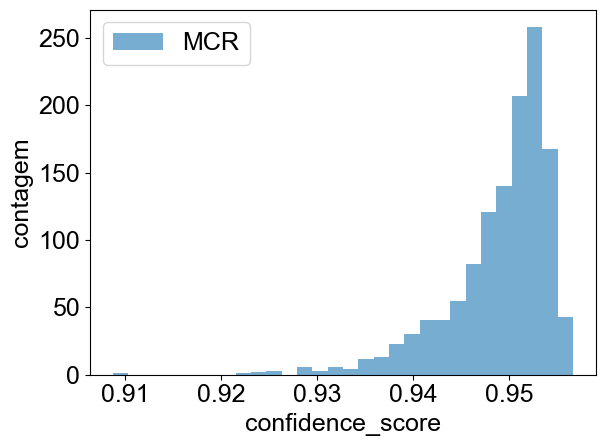

In [24]:
vals_mcr = df_mcr["confidence_score"].dropna().astype(float).values
plt.hist(vals_mcr, bins=30, alpha=0.6, label="MCR")

plt.xlabel("confidence_score")
plt.ylabel("contagem")
plt.legend()
plt.tight_layout()
plt.show()

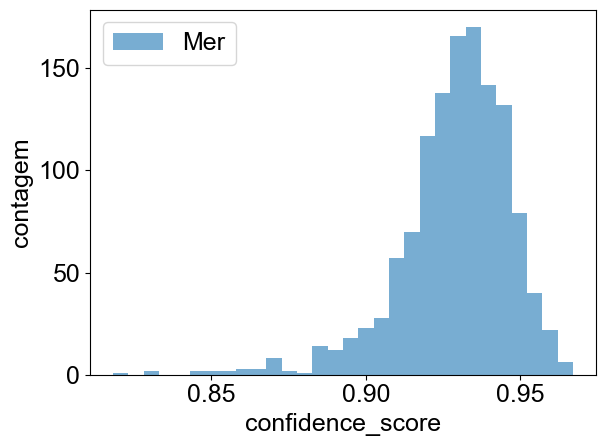

In [27]:
vals_mer = df_mer["confidence_score"].dropna().astype(float).values
plt.hist(vals_mer, bins=30, alpha=0.6, label="Mer")

plt.xlabel("confidence_score")
plt.ylabel("contagem")
plt.legend()
plt.tight_layout()
plt.show()

<Axes: title={'center': 'MER'}, xlabel='ligand_iptm', ylabel='affinity_probability_binary'>

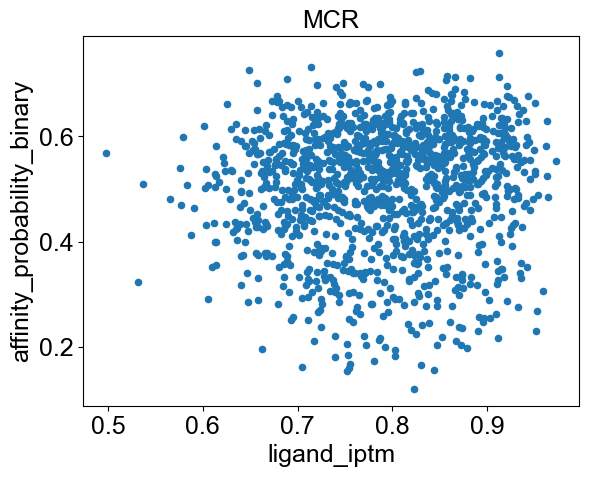

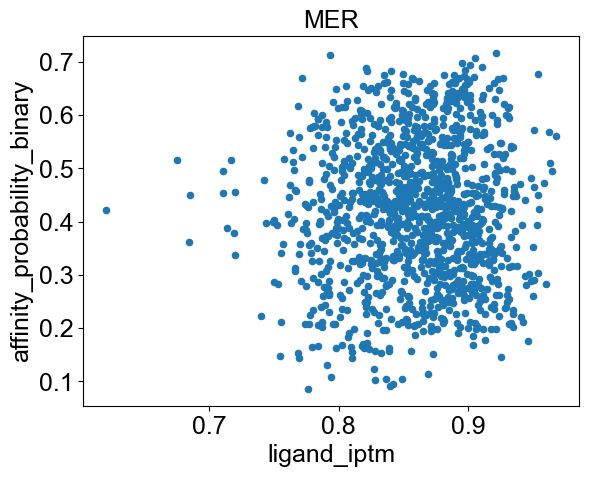

In [39]:
xcol = "ligand_iptm"
ycol = "affinity_probability_binary"

mcr = df_mcr[[xcol,ycol]].dropna().astype(float)
mcr.plot(kind="scatter", x=xcol, y=ycol, title="MCR")

mer = df_mer[[xcol,ycol]].dropna().astype(float)
mer.plot(kind="scatter", x=xcol, y=ycol, title="MER")

<Axes: title={'center': 'MER'}, xlabel='iptm', ylabel='affinity_probability_binary'>

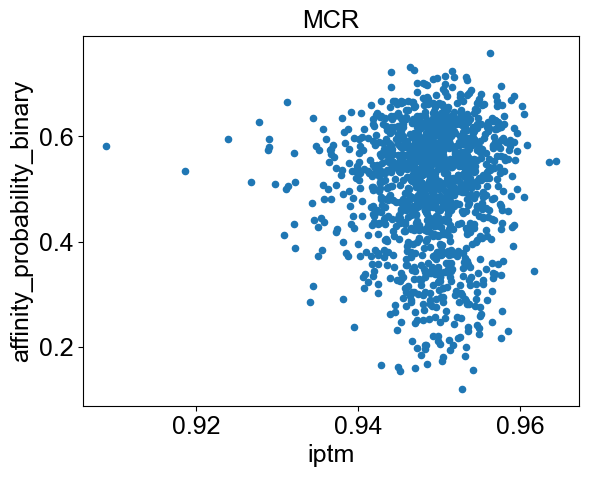

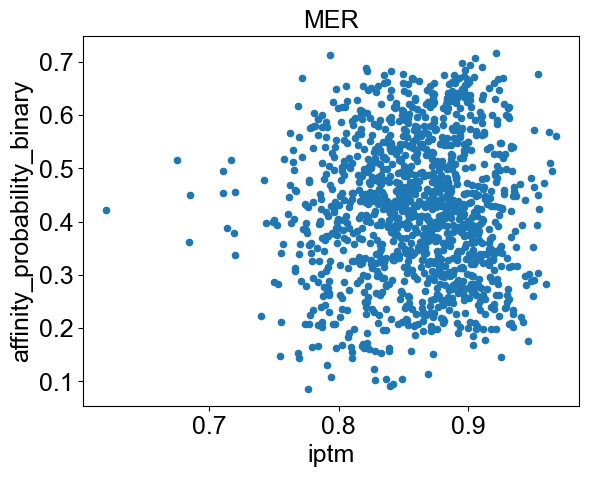

In [40]:
xcol = "iptm"
ycol = "affinity_probability_binary"

mcr = df_mcr[[xcol,ycol]].dropna().astype(float)
mcr.plot(kind="scatter", x=xcol, y=ycol, title="MCR")

mer = df_mer[[xcol,ycol]].dropna().astype(float)
mer.plot(kind="scatter", x=xcol, y=ycol, title="MER")

<Axes: title={'center': 'MER'}, xlabel='ligand_iptm', ylabel='confidence_score'>

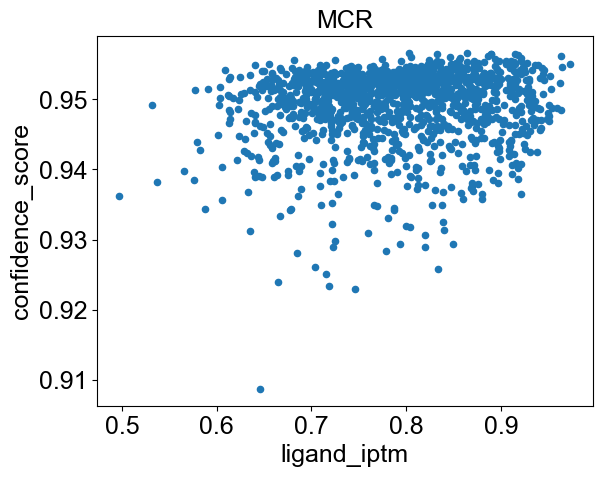

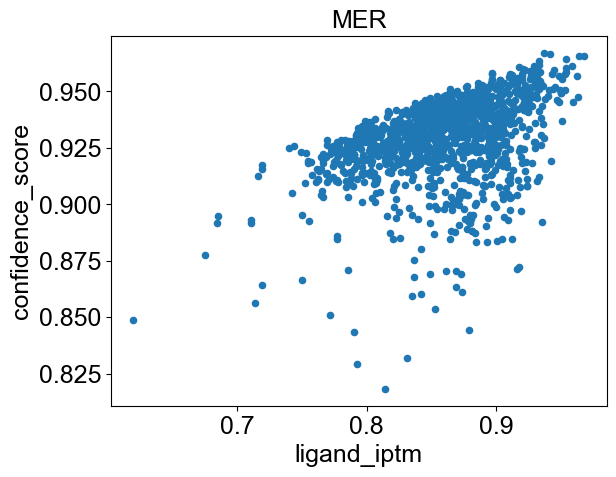

In [41]:
xcol = "ligand_iptm"
ycol = "confidence_score"

mcr = df_mcr[[xcol,ycol]].dropna().astype(float)
mcr.plot(kind="scatter", x=xcol, y=ycol, title="MCR")

mer = df_mer[[xcol,ycol]].dropna().astype(float)
mer.plot(kind="scatter", x=xcol, y=ycol, title="MER")

### MCR

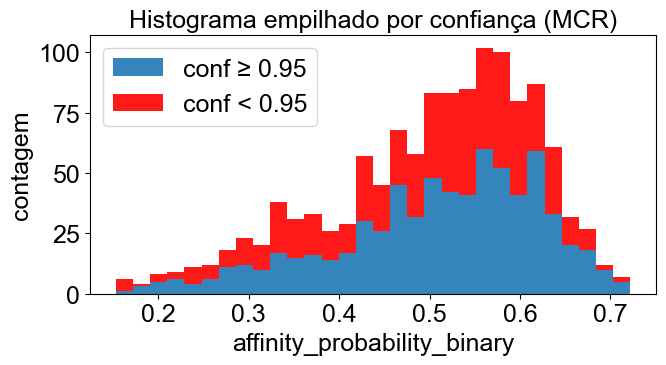

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) selecione e limpe as séries
aff = pd.to_numeric(df_mcr["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df_mcr["confidence_score"], errors="coerce")
valid = aff.notna() & conf.notna()
aff = aff[valid]; conf = conf[valid]

# 2) defina os bins (ajuste o número se quiser)
bins = 30
counts_low, bin_edges = np.histogram(aff[conf < 0.95], bins=bins)
counts_high, _        = np.histogram(aff[conf >= 0.95], bins=bin_edges)

# 3) plote empilhado (a parte vermelha é proporcional ao total do bin)
bin_lefts = bin_edges[:-1]
bin_widths = np.diff(bin_edges)

plt.figure(figsize=(7,4))
# camada de cima: “alto” (≥ 0.9) — sem cor explícita (usa padrão)
plt.bar(bin_lefts, counts_high, width=bin_widths, align="edge", alpha=0.9, label="conf ≥ 0.95")
# camada de baixo: “baixo” (< 0.9) — vermelho
plt.bar(bin_lefts, counts_low, width=bin_widths, align="edge", alpha=0.9,
        bottom=counts_high, label="conf < 0.95", color="red")

plt.xlabel("affinity_probability_binary")
plt.ylabel("contagem")
plt.title("Histograma empilhado por confiança (MCR)")
plt.legend()
plt.tight_layout()
plt.show()


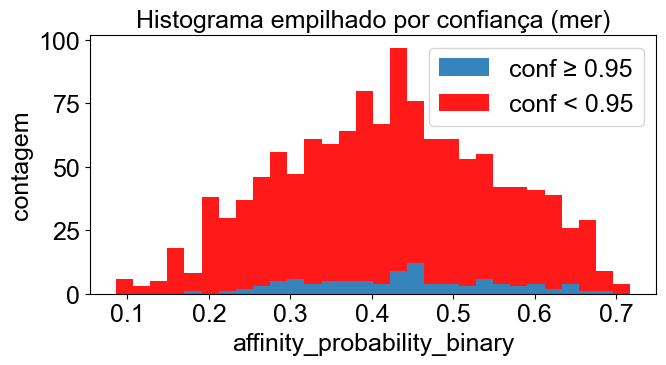

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) selecione e limpe as séries
aff = pd.to_numeric(df_mer["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df_mer["confidence_score"], errors="coerce")
valid = aff.notna() & conf.notna()
aff = aff[valid]; conf = conf[valid]

# 2) defina os bins (ajuste o número se quiser)
bins = 30
counts_low, bin_edges = np.histogram(aff[conf < 0.95], bins=bins)
counts_high, _        = np.histogram(aff[conf >= 0.95], bins=bin_edges)

# 3) plote empilhado (a parte vermelha é proporcional ao total do bin)
bin_lefts = bin_edges[:-1]
bin_widths = np.diff(bin_edges)

plt.figure(figsize=(7,4))
# camada de cima: “alto” (≥ 0.9) — sem cor explícita (usa padrão)
plt.bar(bin_lefts, counts_high, width=bin_widths, align="edge", alpha=0.9, label="conf ≥ 0.95")
# camada de baixo: “baixo” (< 0.9) — vermelho
plt.bar(bin_lefts, counts_low, width=bin_widths, align="edge", alpha=0.9,
        bottom=counts_high, label="conf < 0.95", color="red")

plt.xlabel("affinity_probability_binary")
plt.ylabel("contagem")
plt.title("Histograma empilhado por confiança (mer)")
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

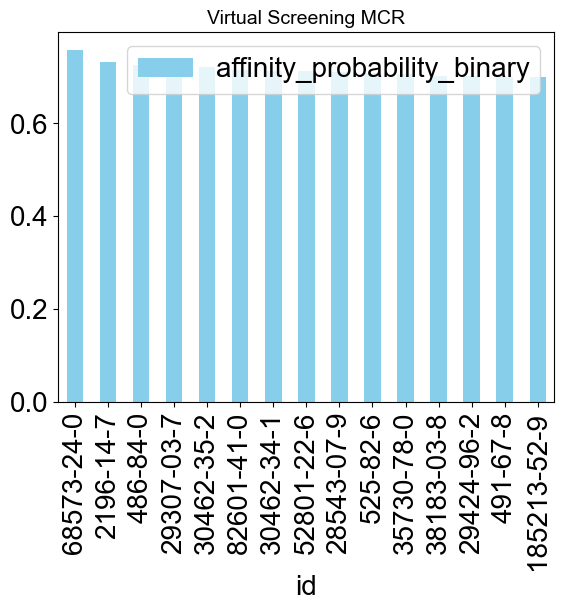

1016     68573-24-0
323       2196-14-7
667        486-84-0
428      29307-03-7
447      30462-35-2
1147     82601-41-0
446      30462-34-1
782      52801-22-6
413      28543-07-9
775        525-82-6
505      35730-78-0
525      38183-03-8
431      29424-96-2
685        491-67-8
242     185213-52-9
Name: id, dtype: object


In [15]:
top_15_mcr = df_mcr.sort_values("affinity_probability_binary", ascending=False).head(15)

plt.figure(figsize=(10,6))
top_15_mcr.plot(x='id', y='affinity_probability_binary', kind="bar", color="skyblue")
plt.title("Virtual Screening MCR", fontsize=14)
plt.show()

print(top_15_mcr["id"])

# colcar confiancia!!! 

### MER

<Figure size 1000x600 with 0 Axes>

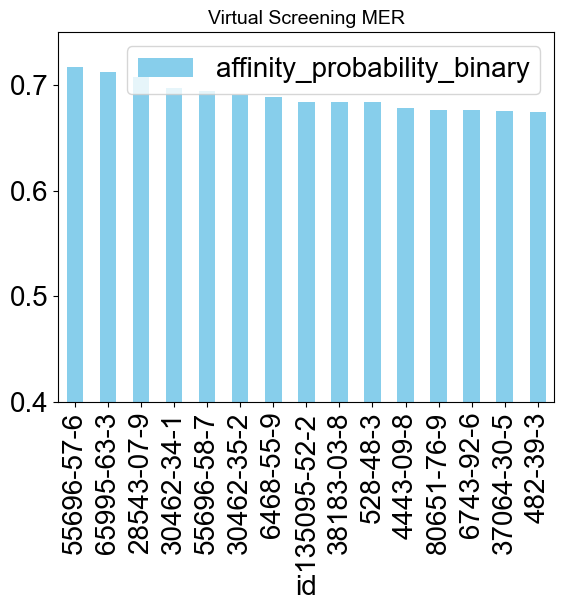

In [16]:
top_15_mer = df_mer.sort_values("affinity_probability_binary", ascending=False).head(15)

plt.figure(figsize=(10,6))
top_15_mer.plot(x='id', y='affinity_probability_binary', kind="bar", color="skyblue")
plt.ylim(0.4,0.75)
plt.title("Virtual Screening MER", fontsize=14)
plt.show()

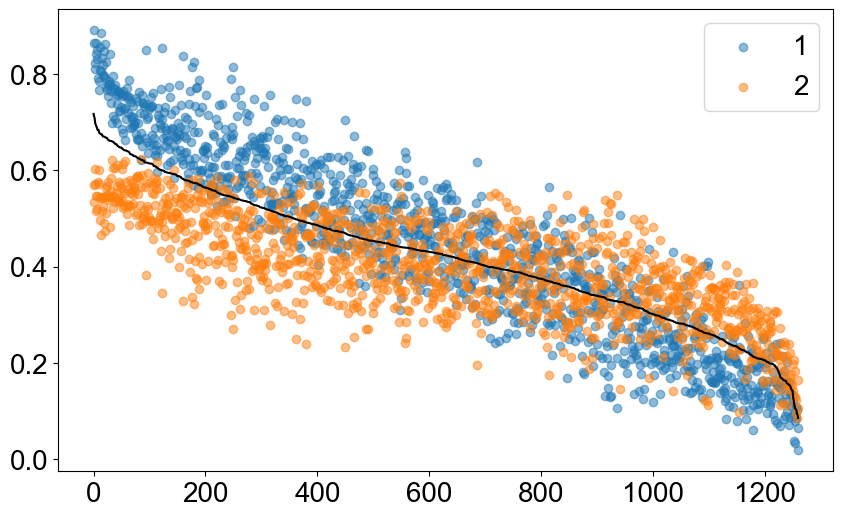

In [17]:
df_mer_sorted = df_mer.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mer_sorted.index, df_mer_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mer_sorted.index, df_mer_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mer_sorted.index, df_mer_sorted["affinity_probability_binary"], color="blacK")
plt.legend()

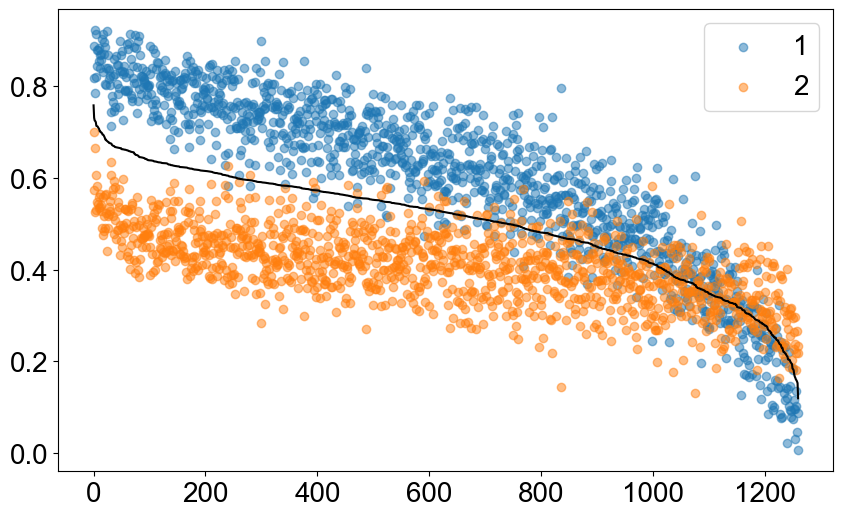

In [18]:
df_mcr_sorted = df_mcr.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary"], color="blacK")
plt.legend()

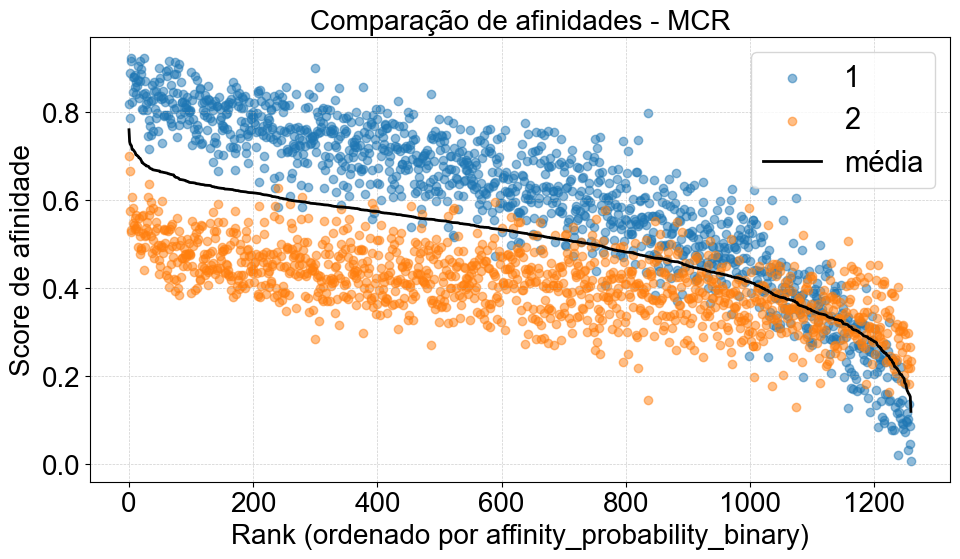

In [19]:
df_mcr_sorted = df_mcr.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary"], color="black", linewidth=2, label="média")

plt.title("Comparação de afinidades - MCR")
plt.xlabel("Rank (ordenado por affinity_probability_binary)")
plt.ylabel("Score de afinidade")
plt.legend(fontsize=21)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


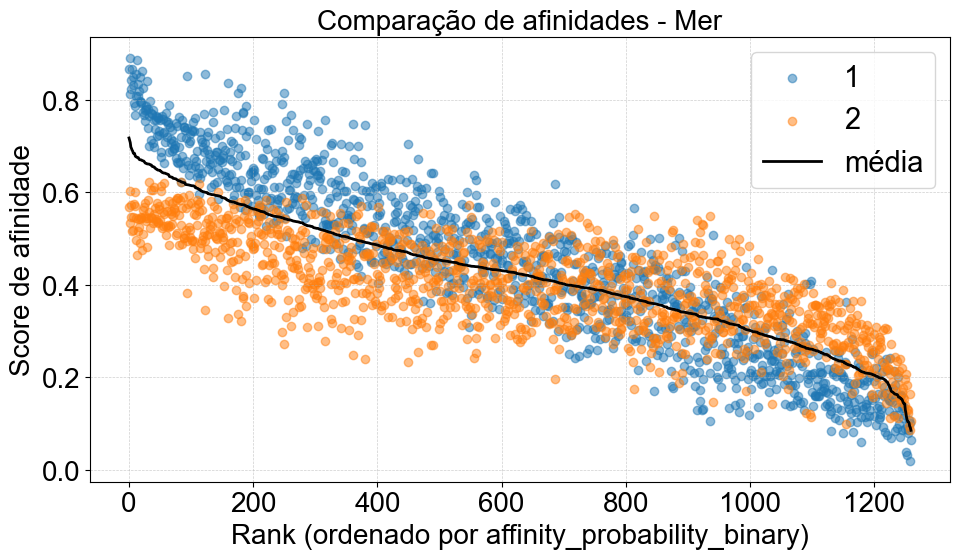

In [20]:
df_mer_sorted = df_mer.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mcr_sorted.index, df_mer_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mcr_sorted.index, df_mer_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mcr_sorted.index, df_mer_sorted["affinity_probability_binary"], color="black", linewidth=2, label="média")

plt.title("Comparação de afinidades - Mer")
plt.xlabel("Rank (ordenado por affinity_probability_binary)")
plt.ylabel("Score de afinidade")
plt.legend(fontsize=21)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


### Relações entre as variáveis

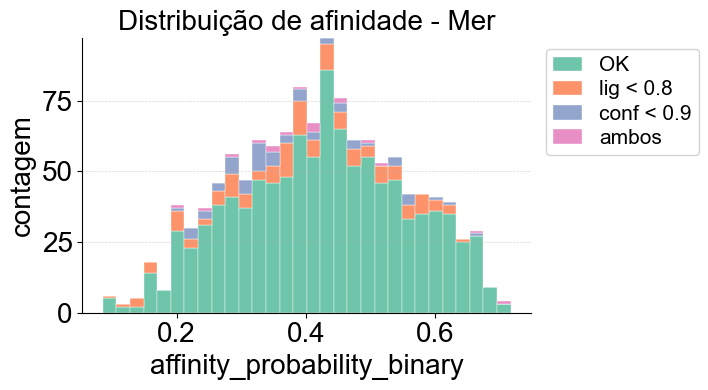

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== escolha a paleta =====
PAL = "set2"   # "tableau" | "set2" | "muted"

PALETTES = {
    # tons vivos, equilibrados (Tableau 10)
    "tableau": {
        "OK":   "#4E79A7",  # azul
        "LIG":  "#F28E2B",  # laranja
        "CONF": "#E15759",  # vermelho
        "BOTH": "#76B7B2",  # teal
    },
    # Set2 (mais suave)
    "set2": {
        "OK":   "#66C2A5",  # verde-água
        "LIG":  "#FC8D62",  # laranja
        "CONF": "#8DA0CB",  # azul-lilás
        "BOTH": "#E78AC3",  # rosa
    },
    # Muted (alto contraste sem “gritar”)
    "muted": {
        "OK":   "#3B7EA1",  # azul petróleo
        "LIG":  "#D17C2E",  # cobre
        "CONF": "#C33C3C",  # vermelho tijolo
        "BOTH": "#7A6BB7",  # roxo
    },
}
COL = PALETTES[PAL]

# ===== seus dados =====
df = df_mer  # ou df_mcr

aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

mask = aff.notna() & conf.notna() & lig.notna()
aff, conf, lig = aff[mask], conf[mask], lig[mask]

fail_both = (conf < 0.9) & (lig < 0.8)
fail_conf = (conf < 0.9) & ~(lig < 0.8)
fail_lig  = ~(conf < 0.9) & (lig < 0.8)
ok        = ~(fail_both | fail_conf | fail_lig)

bin_edges = np.histogram_bin_edges(aff, bins=30)
lefts, widths = bin_edges[:-1], np.diff(bin_edges)

c_ok,   _ = np.histogram(aff[ok],        bins=bin_edges)
c_lig,  _ = np.histogram(aff[fail_lig],  bins=bin_edges)
c_conf, _ = np.histogram(aff[fail_conf], bins=bin_edges)
c_both, _ = np.histogram(aff[fail_both], bins=bin_edges)

fig, ax = plt.subplots(figsize=(7.5, 4.3))

ax.bar(lefts, c_ok,   width=widths, align="edge", alpha=0.95,
       edgecolor="white", linewidth=0.3, label="OK",         color=COL["OK"])
ax.bar(lefts, c_lig,  width=widths, align="edge", alpha=0.95,
       bottom=c_ok, edgecolor="white", linewidth=0.3, label="lig < 0.8",  color=COL["LIG"])
ax.bar(lefts, c_conf, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig, edgecolor="white", linewidth=0.3, label="conf < 0.9", color=COL["CONF"])
ax.bar(lefts, c_both, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig+c_conf, edgecolor="white", linewidth=0.3, label="ambos",     color=COL["BOTH"])

ax.set_xlabel("affinity_probability_binary")
ax.set_ylabel("contagem")
ax.set_title(f"Distribuição de afinidade - Mer")

ax.grid(True, axis="y", linestyle="--", linewidth=0.5, alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(
    fontsize=15, markerscale=0.9, handlelength=1.4,
    labelspacing=0.25, borderpad=0.35, framealpha=0.85,
    bbox_to_anchor=(1.01, 1), loc="upper left"
)

plt.tight_layout()
plt.show()


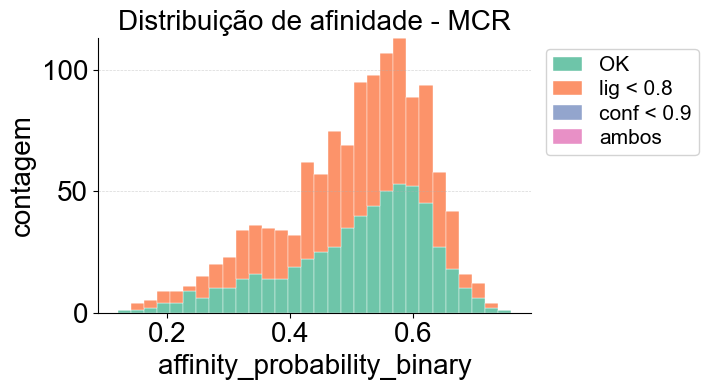

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== escolha a paleta =====
PAL = "set2"   # "tableau" | "set2" | "muted"

PALETTES = {
    # tons vivos, equilibrados (Tableau 10)
    "tableau": {
        "OK":   "#4E79A7",  # azul
        "LIG":  "#F28E2B",  # laranja
        "CONF": "#E15759",  # vermelho
        "BOTH": "#76B7B2",  # teal
    },
    # Set2 (mais suave)
    "set2": {
        "OK":   "#66C2A5",  # verde-água
        "LIG":  "#FC8D62",  # laranja
        "CONF": "#8DA0CB",  # azul-lilás
        "BOTH": "#E78AC3",  # rosa
    },
    # Muted (alto contraste sem “gritar”)
    "muted": {
        "OK":   "#3B7EA1",  # azul petróleo
        "LIG":  "#D17C2E",  # cobre
        "CONF": "#C33C3C",  # vermelho tijolo
        "BOTH": "#7A6BB7",  # roxo
    },
}
COL = PALETTES[PAL]

# ===== seus dados =====
df = df_mcr  # ou df_mcr

aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

mask = aff.notna() & conf.notna() & lig.notna()
aff, conf, lig = aff[mask], conf[mask], lig[mask]

fail_both = (conf < 0.9) & (lig < 0.8)
fail_conf = (conf < 0.9) & ~(lig < 0.8)
fail_lig  = ~(conf < 0.9) & (lig < 0.8)
ok        = ~(fail_both | fail_conf | fail_lig)

bin_edges = np.histogram_bin_edges(aff, bins=30)
lefts, widths = bin_edges[:-1], np.diff(bin_edges)

c_ok,   _ = np.histogram(aff[ok],        bins=bin_edges)
c_lig,  _ = np.histogram(aff[fail_lig],  bins=bin_edges)
c_conf, _ = np.histogram(aff[fail_conf], bins=bin_edges)
c_both, _ = np.histogram(aff[fail_both], bins=bin_edges)

fig, ax = plt.subplots(figsize=(7.5, 4.3))

ax.bar(lefts, c_ok,   width=widths, align="edge", alpha=0.95,
       edgecolor="white", linewidth=0.3, label="OK",         color=COL["OK"])
ax.bar(lefts, c_lig,  width=widths, align="edge", alpha=0.95,
       bottom=c_ok, edgecolor="white", linewidth=0.3, label="lig < 0.8",  color=COL["LIG"])
ax.bar(lefts, c_conf, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig, edgecolor="white", linewidth=0.3, label="conf < 0.9", color=COL["CONF"])
ax.bar(lefts, c_both, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig+c_conf, edgecolor="white", linewidth=0.3, label="ambos",     color=COL["BOTH"])

ax.set_xlabel("affinity_probability_binary")
ax.set_ylabel("contagem")
ax.set_title(f"Distribuição de afinidade - MCR")

ax.grid(True, axis="y", linestyle="--", linewidth=0.5, alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(
    fontsize=15, markerscale=0.9, handlelength=1.4,
    labelspacing=0.25, borderpad=0.35, framealpha=0.85,
    bbox_to_anchor=(1.01, 1), loc="upper left"
)

plt.tight_layout()
plt.show()


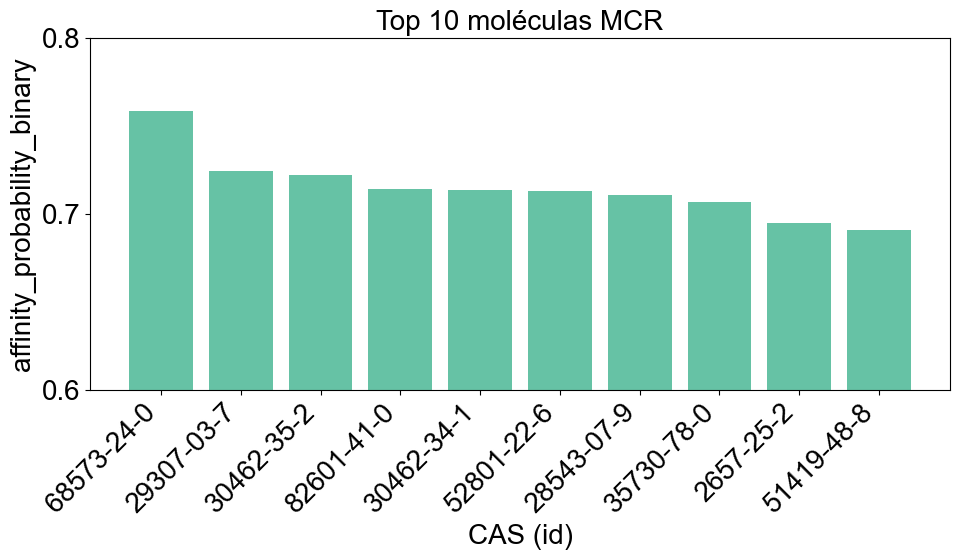

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# escolha o conjunto
df = df_mcr   # troque para df_mcr se quiser o outro

# garante colunas numéricas
aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

# filtros
mask = aff.notna() & (conf >= 0.9) & (lig >= 0.8)

df_ok = df.loc[mask, ["id", "affinity_probability_binary"]].copy()
df_ok = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

# --- Plot: ranking top-10 por afinidade, eixo X = CAS (id) ---
plt.figure(figsize=(10,6))
plt.bar(df_ok["id"], df_ok["affinity_probability_binary"], color= "#66C2A5")
plt.xlabel("CAS (id)")
plt.ylabel("affinity_probability_binary")
plt.title("Top 10 moléculas MCR")
plt.xticks(rotation=45, ha="right")
plt.ylim([0.6,0.8])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.tight_layout()
plt.show()

df_ok_mcr = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

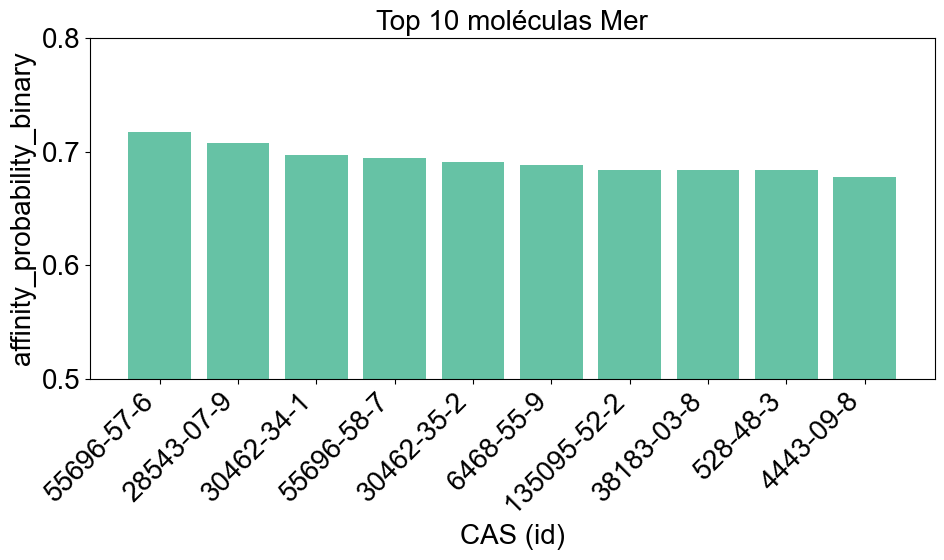

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# escolha o conjunto
df = df_mer   # troque para df_mcr se quiser o outro

# garante colunas numéricas
aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

# filtros
mask = aff.notna() & (conf >= 0.9) & (lig >= 0.8)

df_ok = df.loc[mask, ["id", "affinity_probability_binary"]].copy()
df_ok = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

# --- Plot: ranking top-10 por afinidade, eixo X = CAS (id) ---
plt.figure(figsize=(10,6))
plt.bar(df_ok["id"], df_ok["affinity_probability_binary"], color= "#66C2A5")
plt.xlabel("CAS (id)")
plt.ylabel("affinity_probability_binary")
plt.ylim([0.5,0.8])
plt.title("Top 10 moléculas Mer")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

df_ok_mer = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

In [143]:
comuns = set(df_ok_mcr["id"]) & set(df_ok_mer["id"])
print(comuns)

{'30462-35-2', '28543-07-9', '30462-34-1'}


In [27]:
df_ok_mer

,id,affinity_probability_binary
850,55696-57-6,0.717079
413,28543-07-9,0.707321
446,30462-34-1,0.697380
851,55696-58-7,0.694404
447,30462-35-2,0.690815
971,6468-55-9,0.688494
123,135095-52-2,0.684078
525,38183-03-8,0.683928
781,528-48-3,0.683684
584,4443-09-8,0.678133


In [29]:
print(df_ok_mer['id'])

850     55696-57-6
413     28543-07-9
446     30462-34-1
851     55696-58-7
447     30462-35-2
971      6468-55-9
123    135095-52-2
525     38183-03-8
781       528-48-3
584      4443-09-8
Name: id, dtype: object


In [31]:
print(df_ok_mcr['id'])

1016    68573-24-0
428     29307-03-7
447     30462-35-2
1147    82601-41-0
446     30462-34-1
782     52801-22-6
413     28543-07-9
505     35730-78-0
389      2657-25-2
729     51419-48-8
Name: id, dtype: object


### Sem filtros 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# escolha o conjunto
df = df_mcr   # troque para df_mcr se quiser o outro

# garante colunas numéricas
aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

# filtros
mask = aff.notna() & (conf >= 0.9) & (lig >= 0.8)

df_ok = df.copy()
df_ok = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

# --- Plot: ranking top-10 por afinidade, eixo X = CAS (id) ---
plt.figure(figsize=(10,6))
plt.bar(df_ok["id"], df_ok["affinity_probability_binary"], color= "#66C2A5")
plt.xlabel("CAS (id)")
plt.ylabel("affinity_probability_binary")
plt.title("Top 10 moléculas MCR")
plt.xticks(rotation=45, ha="right")
plt.ylim([0.6,0.8])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.tight_layout()
plt.show()

df_ok_mcr = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)